# Example of Using Plotting Functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.__version__

'3.5.3'

## Simulate uniform true position and apply random error

In [2]:
from pos_gen import get_random_points_in_circle, get_small_err

N = int(1e5)
radius = 50.
resolution = 0.5

true_pos = get_random_points_in_circle(n=N, radius=radius)
err = get_small_err(n=N, scale = resolution)
data_pos = true_pos+err

## Plot distribution of errors

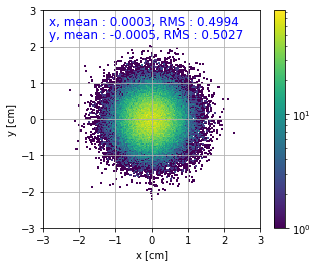

In [3]:
from plotting import plot_2d_err

fig, ax = plt.subplots(figsize = (5,4))
h = plot_2d_err(data_pos, true_pos, ax)
fig.colorbar(h, ax = ax)
plt.show()

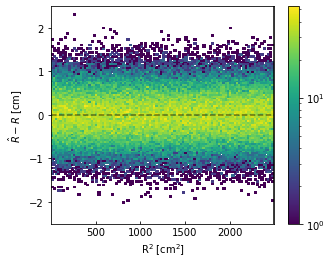

In [6]:
from plotting import plot_r_err_vs_r2

fig, ax = plt.subplots(figsize = (5,4))
h = plot_r_err_vs_r2(data_pos, true_pos, ax, max_r = 50.)
fig.colorbar(h, ax = ax)
ax.set_xlabel(r"R$^2$ [cm$^2$]")
ax.set_ylabel(r"$\hat{R} - R$ [cm]")
plt.show()

## Simulate uniform true distribution and apply area dependent random error

In [3]:
def resolution_model(area):
    return 3/np.sqrt(area)+0.1

N = int(1e5)
radius = 50.

area = np.random.uniform(low=10, high=10000, size=N)

resolution = resolution_model(area)

true_pos = get_random_points_in_circle(n=N, radius=radius)
err = resolution.reshape(-1,1) * get_small_err(n=N, scale=1.)
data_pos = true_pos+err


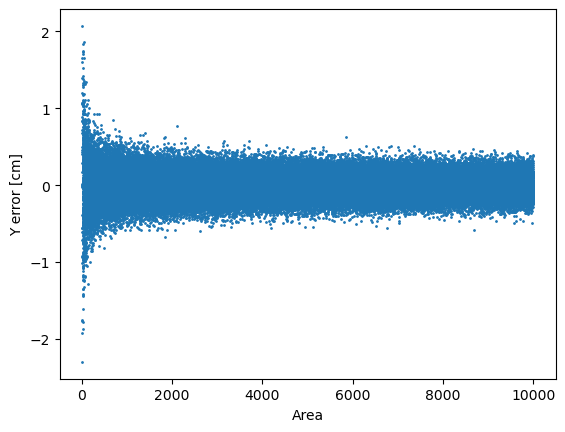

In [4]:
# A quick validation...

plt.scatter(area, err[:,1], s = 1)

plt.xlabel("Area")
plt.ylabel("Y error [cm]")

plt.show()

## Plot resolution vs area and fit an empirical model

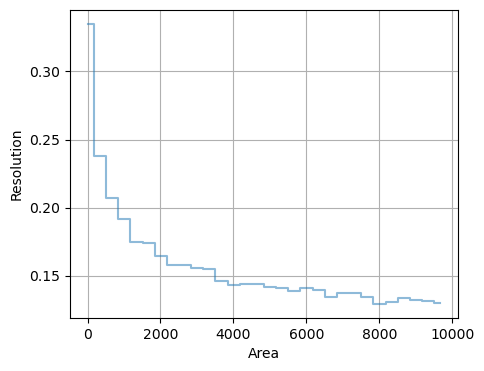

In [6]:
from plotting import quantile_by_area

# plotting the resolution only

bins = np.linspace(10,10000,31)

fig, ax = plt.subplots(figsize = (5,4))
quantile_by_area(data_pos, true_pos, area = area, bins = bins, ax = ax)

ax.grid(True)
ax.set_xlabel(r"Area")
ax.set_ylabel(r"Resolution")
plt.show()